# Задача X.8.3

Условие: Решить систему дифференциальных уравнений на интервале $[0,10]$:
$$
\begin{equation*}
  \left\{
    \begin{aligned}
      & u' = 998u + 1998 v \\
      & v' = -999u - 1999v 
    \end{aligned}
  \right.
\end{equation*}
$$
с начальными значениями $u(0) = v(0) = 1$ явным и неявным методами Эйлера, решение сравнить с точным решением. На основании проведенных
расчетов определить условие монотонности явного метода Эйлера.

Начнем с точного решения этого уравнения:

$$
\begin{equation*}
  \left\{
    \begin{aligned}
      & u(t) = 4e^{-t} -3e^{-1000t} \\
      & v(t) = -2e^{-t} + 3e^{-1000t} 
    \end{aligned}
  \right.
\end{equation*}
$$

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

def accurate_solution(t: float):
    u = 4 * math.exp(-1*t) - 3*math.exp(-1000*t)
    v = -2 * math.exp(-1*t) + 3*math.exp(-1000*t)

    return u, v

def accurate_solution_method(t_start, t_end, h):
    t = np.arange(t_start, t_end + h, h)
    u = np.zeros_like(t)
    v = np.zeros_like(t)

    for i in range(len(t)):
        u[i], v[i] = accurate_solution(t[i])
        
    return t, u, v

Далее перейдем к решению явным методом Эйлера:

In [6]:
def explicit_euler_method(u_0, v_0, t_start, t_end, h):
    t = np.arange(t_start, t_end + h, h)
    u = np.zeros_like(t)
    v = np.zeros_like(t)
    u[0], v[0] = u_0, v_0
    
    for i in range(len(t) - 1):
        A = np.array([[1 + 998 * h, 1998 * h],
                      [-999 * h, 1 - 1999 * h]])
        b = np.array([u[i], v[i]])
        u[i+1], v[i+1] = np.dot(A, b)
    
    return t, u, v

Неявный метод Эйлера:

In [7]:
def implicit_euler_method(u_0, v_0, t_start, t_end, h):
    t = np.arange(t_start, t_end + h, h)
    u = np.zeros_like(t)
    v = np.zeros_like(t)
    u[0], v[0] = u_0, v_0 
    
    for i in range(len(t) - 1):
        A = np.array([[1 - 998 * h, -1998 * h],
                      [999 * h, 1 + 1999 * h]])
        b = np.array([u[i], v[i]])
        u[i+1], v[i+1] = np.linalg.solve(A, b)
    
    return t, u, v

Функция для построения графиков наших решений:

In [8]:
def plot_graph(x, y1, y2, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(x, y1)
    ax1.grid()
    ax1.set_xlabel("t")
    ax1.set_ylabel("u(t)")
    

    ax2.plot(x, y2)
    ax2.grid()
    ax2.set_xlabel("t")
    ax2.set_ylabel("v(t)")

    fig.suptitle(title)

    plt.show()

Определим шаг интегрирования из следующего условия:
$$
h \cdot \lvert B \rvert \ll 1
$$
где $B$ - матрица правой части нашей системы

In [9]:
B = np.array([[998, 1998],
              [-999, -1999]])
eigenvalues = np.linalg.eigvals(B)
max_abs_eigenvalue = np.max(np.abs(eigenvalues))
h = 0.01 / max_abs_eigenvalue
print(h)

1e-05


Сравним полученные решения с точным:

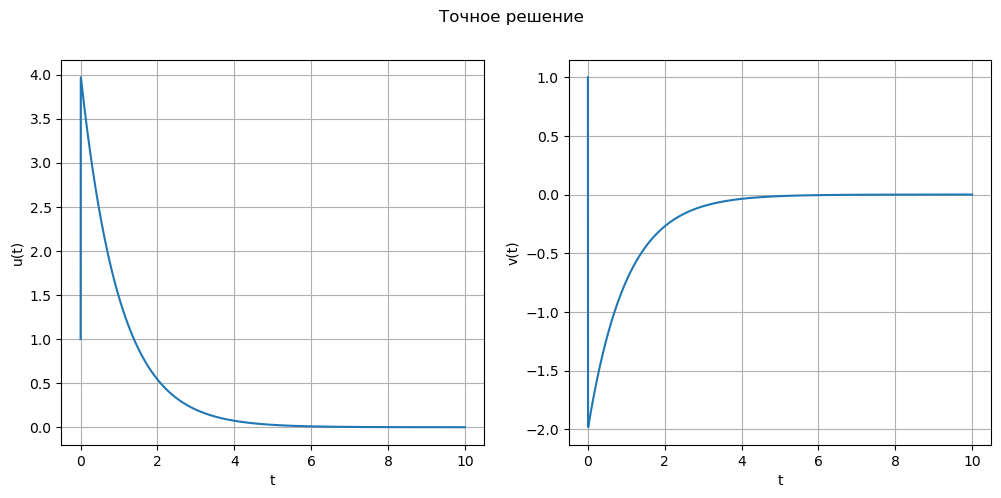

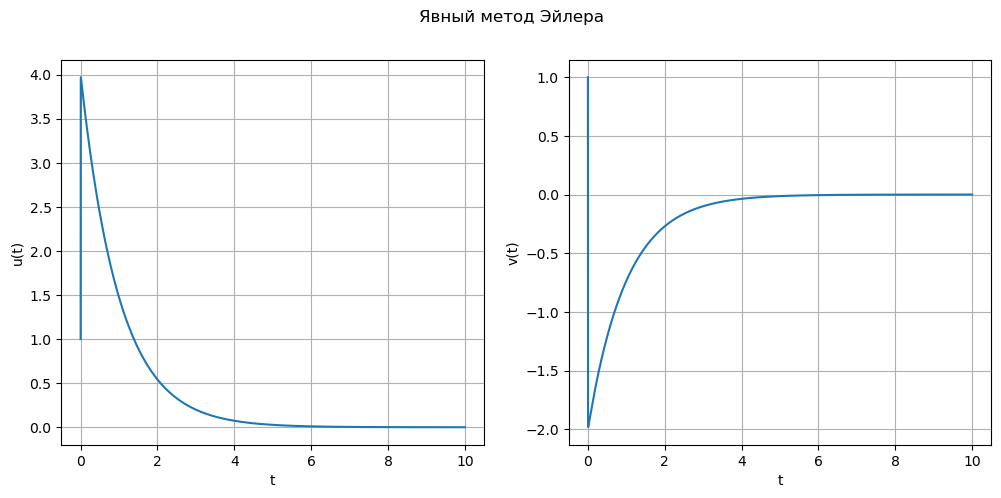

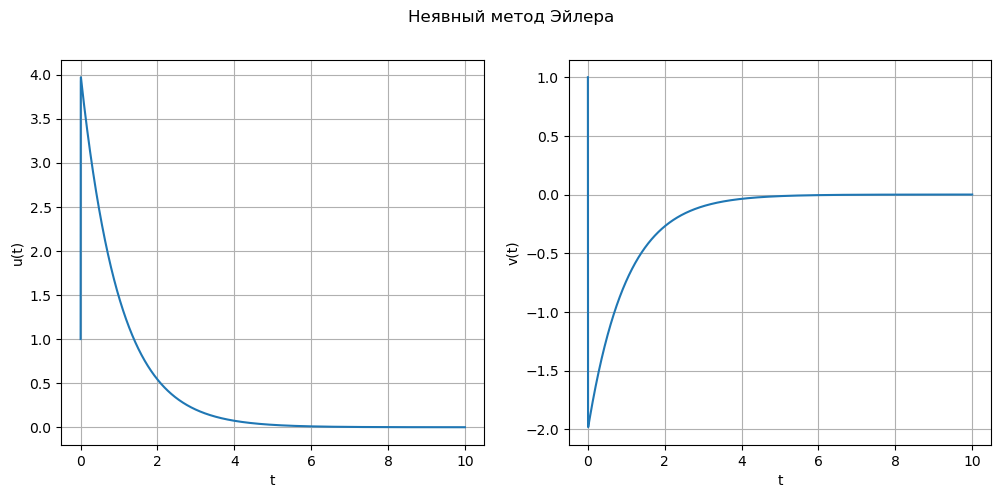

In [12]:
u_0, v_0 = 1, 1
t_start = 0
t_end = 10
# Измените этот параметр, например h = 0.01, для того, чтобы увидеть, как меняется решение, полученное с помощью явного метода Эйлера
h = 1e-5

t_exp, u_exp, v_exp = explicit_euler_method(u_0, v_0, t_start, t_end, h)
t_imp, u_imp, v_imp = implicit_euler_method(u_0, v_0, t_start, t_end, h)
t_acc, u_acc, v_acc = accurate_solution_method(t_start, t_end, h)

plot_graph(t_acc, u_acc, v_acc, "Точное решение")
plot_graph(t_exp, u_exp, v_exp, "Явный метод Эйлера")
plot_graph(t_imp, u_imp, v_imp, "Неявный метод Эйлера")

Построим также графики для погрешности каждого из методов

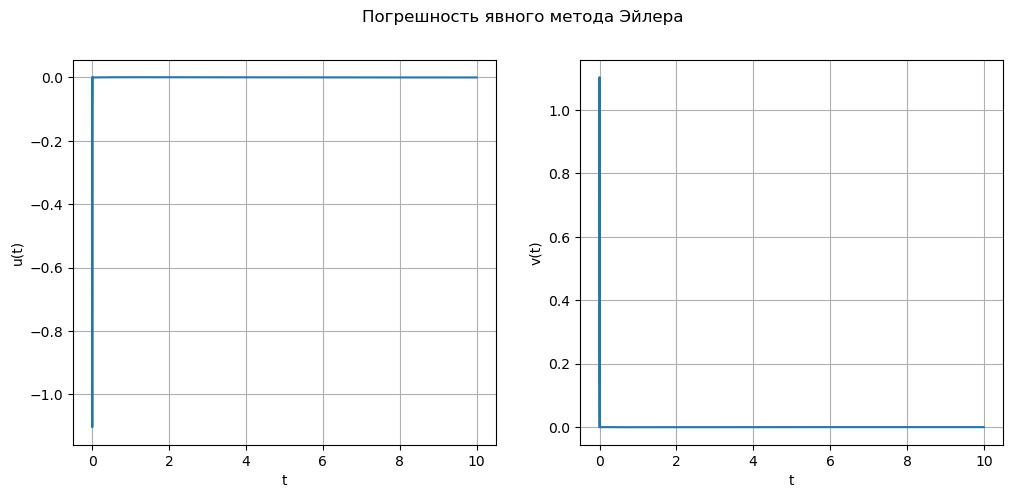

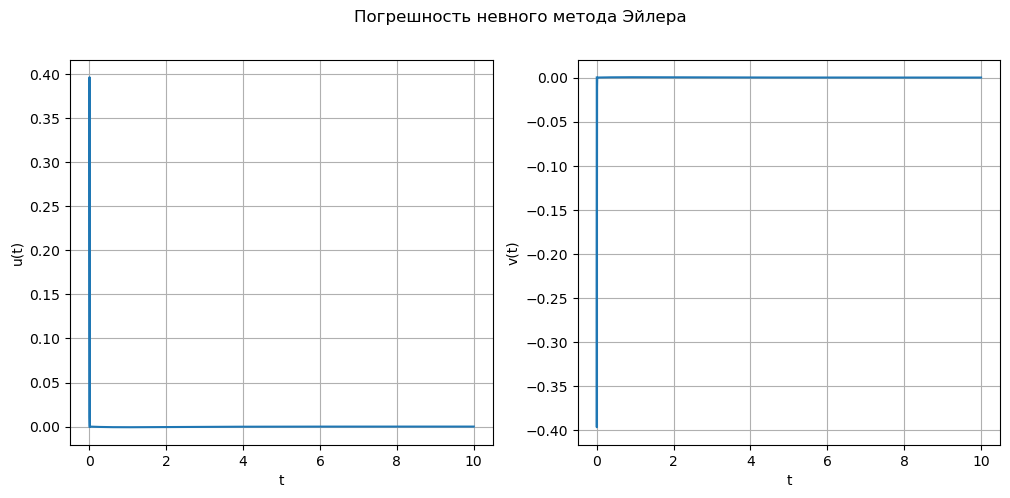

In [11]:
def absolute_error(list1, list2):
    return [a - b for a, b in zip(list1, list2)]

u_exp_error = absolute_error(u_acc, u_exp)
v_exp_error = absolute_error(v_acc, v_exp)
plot_graph(t_exp, u_exp_error, v_exp_error, "Погрешность явного метода Эйлера")

u_imp_error = absolute_error(u_acc, u_imp)
v_imp_error = absolute_error(v_acc, v_imp)
plot_graph(t_imp, u_imp_error, v_imp_error, "Погрешность невного метода Эйлера")


Определение монотонности :
$$
\text{При } Im{z} = 0, Re{z} < 0\\ R(z) > 0
$$

Функция устойчивости для явного метода Эйлера имеет вид:
$$ R(z) = 1 + z$$

Применяя эти условия, получаем, что:
$$ h < 0,001 $$

Изменяя h, можно убедиться, что при выполнении этого условия явный метод Эйлера начинает правильно аппроксимировать точное решение